In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

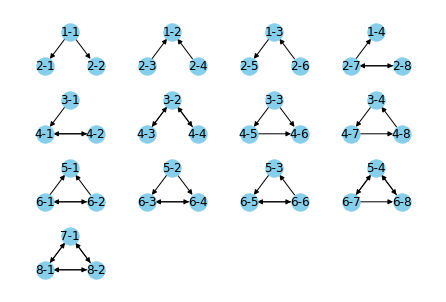

In [37]:
G = nx.DiGraph()

nodes_with_positions = {
    '1-1': (2, 0), '1-2': (10, 0), '1-3': (18, 0), '1-4': (26, 0),
    '2-1': (0, -1), '2-2': (4, -1), '2-3': (8, -1), '2-4': (12, -1),  
    '2-5': (16, -1), '2-6': (20, -1), '2-7': (24, -1),  '2-8': (28, -1), 
    '3-1': (2, -2), '3-2': (10, -2), '3-3': (18, -2), '3-4': (26, -2), 
    '4-1': (0, -3), '4-2': (4, -3), '4-3': (8, -3), '4-4': (12, -3), 
    '4-5': (16, -3), '4-6': (20, -3), '4-7': (24, -3), '4-8': (28, -3), 
    '5-1': (2, -4), '5-2': (10, -4), '5-3': (18, -4), '5-4': (26, -4),
    '6-1': (0, -5), '6-2': (4, -5), '6-3': (8, -5), '6-4': (12, -5), 
    '6-5': (16, -5), '6-6': (20, -5), '6-7': (24, -5), '6-8': (28, -5), 
    '7-1': (2, -6),
    '8-1': (0, -7), '8-2': (4, -7) 
}

G.add_nodes_from(nodes_with_positions.keys())

edges = [
    ('1-1', '2-1'), ('1-1', '2-2'), 
    ('2-3', '1-2'), ('2-4', '1-2'),
    ('1-3', '2-5'), ('2-6', '1-3'), 
    ('2-7', '1-4'), ('2-7', '2-8'), ('2-8', '2-7'),
    ('3-1', '4-1'), ('4-1', '4-2'), ('4-2', '4-1'),
    ('3-2', '4-3'), ('3-2', '4-4'), ('4-3', '3-2'), ('4-4', '3-2'),
    ('3-3', '4-5'), ('3-3', '4-6'), ('4-5', '4-6'), 
    ('3-4', '4-7'), ('4-7', '4-8'), ('4-8', '3-4'),
    ('6-1', '5-1'), ('6-2', '5-1'), ('6-1', '6-2'), ('6-2', '6-1'), 
    ('5-2', '6-3'), ('5-2', '6-4'), ('6-3', '6-4'), ('6-4', '6-3'),
    ('5-3', '6-5'), ('6-6', '6-5'), ('6-5', '6-6'), ('6-6', '5-3'), 
    ('5-4', '6-7'), ('5-4', '6-8'), ('6-7', '6-8'), ('6-7', '5-4'), ('6-8', '5-4'),
    ('7-1', '8-1'), ('7-1', '8-2'), ('8-1', '7-1'), ('8-1', '8-2'), ('8-2', '8-1'), ('8-2', '7-1')
]
G.add_edges_from(edges)

pos = nodes_with_positions
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='k', arrows=True)
plt.show()

In [38]:
def he(G, u, v):
    return G.has_edge(u, v)

In [39]:
def nhe(G, u, v):
    return not G.has_edge(u, v)

In [40]:
def fanout(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and he(G, nodes[0], nodes[2]) and nhe(G, nodes[1], nodes[0]) and \
        nhe(G, nodes[2], nodes[0]) and nhe(G, nodes[2], nodes[1]) and nhe(G, nodes[1], nodes[2]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"fanout{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [41]:
def fanin(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[1], nodes[0]) and he(G, nodes[2], nodes[0]) and nhe(G, nodes[0], nodes[1]) and \
        nhe(G, nodes[0], nodes[2]) and nhe(G, nodes[2], nodes[1]) and nhe(G, nodes[1], nodes[2]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"fanin{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [42]:
def cascade(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and he(G, nodes[2], nodes[0]) and nhe(G, nodes[1], nodes[0]) and \
        nhe(G, nodes[0], nodes[2]) and nhe(G, nodes[2], nodes[1]) and nhe(G, nodes[1], nodes[2]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"cascade{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [43]:
def mutualout(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and he(G, nodes[2], nodes[0]) and he(G, nodes[0], nodes[2]) and \
        nhe(G, nodes[1], nodes[0]) and nhe(G, nodes[2], nodes[1]) and nhe(G, nodes[1], nodes[2]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"mutualout{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [44]:
def mutualin(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and nhe(G, nodes[0], nodes[2]) and he(G, nodes[1], nodes[2]) and \
        nhe(G, nodes[1], nodes[0]) and nhe(G, nodes[2], nodes[0]) and he(G, nodes[2], nodes[1]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"mutualin{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [45]:
def bimutual(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and he(G, nodes[0], nodes[2]) and nhe(G, nodes[1], nodes[2]) and \
        he(G, nodes[1], nodes[0]) and he(G, nodes[2], nodes[0]) and nhe(G, nodes[2], nodes[1]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"bimutual{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [46]:
def FFL(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and he(G, nodes[0], nodes[2]) and he(G, nodes[1], nodes[2]) and \
        nhe(G, nodes[1], nodes[0]) and nhe(G, nodes[2], nodes[0]) and nhe(G, nodes[2], nodes[1]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"FFL{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [47]:
def FBL(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and nhe(G, nodes[0], nodes[2]) and he(G, nodes[1], nodes[2]) and \
        nhe(G, nodes[1], nodes[0]) and he(G, nodes[2], nodes[0]) and nhe(G, nodes[2], nodes[1]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"FBL{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [48]:
def regulatingmutual(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if nhe(G, nodes[0], nodes[1]) and nhe(G, nodes[0], nodes[2]) and he(G, nodes[1], nodes[2]) and \
        he(G, nodes[1], nodes[0]) and he(G, nodes[2], nodes[0]) and he(G, nodes[2], nodes[1]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"regulatingmutual{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [49]:
def regulatedmutual(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and he(G, nodes[0], nodes[2]) and he(G, nodes[1], nodes[2]) and \
        nhe(G, nodes[1], nodes[0]) and nhe(G, nodes[2], nodes[0]) and he(G, nodes[2], nodes[1]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"regulatedmutual{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [50]:
def mutualcascade(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and nhe(G, nodes[0], nodes[2]) and he(G, nodes[1], nodes[2]) and \
        nhe(G, nodes[1], nodes[0]) and he(G, nodes[2], nodes[0]) and he(G, nodes[2], nodes[1]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"mutualcascade{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [51]:
def semiclique(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and he(G, nodes[0], nodes[2]) and he(G, nodes[1], nodes[2]) and \
        he(G, nodes[1], nodes[0]) and he(G, nodes[2], nodes[0]) and nhe(G, nodes[2], nodes[1]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"semiclique{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [52]:
def clique(G, k=3):
    node_permutations = list(itertools.permutations(G.nodes(), k))
    subgraphs = []
    for nodes in node_permutations:
        if he(G, nodes[0], nodes[1]) and he(G, nodes[0], nodes[2]) and he(G, nodes[1], nodes[2]) and \
        he(G, nodes[1], nodes[0]) and he(G, nodes[2], nodes[0]) and he(G, nodes[2], nodes[1]):
            subgraphs.append(nodes)
    subgraphs = list(set(tuple(sorted(t)) for t in subgraphs))
    name_subgraphs = [f"clique{i+1}" for i in range(len(subgraphs))]
    return subgraphs, name_subgraphs

In [53]:
one_subgraphs = fanout(G, k=3)
print(one_subgraphs)

[('1-1', '2-1', '2-2')]


In [54]:
one_subgraphs = fanin(G, k=3)
print(one_subgraphs)

[('1-2', '2-3', '2-4')]


In [55]:
subgraphs = cascade(G, k=3)
print(subgraphs)

[('1-3', '2-5', '2-6')]


In [56]:
subgraphs = mutualout(G, k=3)
print(subgraphs)

[('1-4', '2-7', '2-8')]


In [57]:
subgraphs = mutualin(G, k=3)
print(subgraphs)

[('3-1', '4-1', '4-2')]


In [58]:
subgraphs = bimutual(G, k=3)
print(subgraphs)

[('3-2', '4-3', '4-4')]


In [59]:
subgraphs = FFL(G, k=3)
print(subgraphs)

[('3-3', '4-5', '4-6')]


In [60]:
subgraphs = FBL(G, k=3)
print(subgraphs)

[('3-4', '4-7', '4-8')]


In [61]:
subgraphs = regulatingmutual(G, k=3)
print(subgraphs)

[('5-1', '6-1', '6-2')]


In [62]:
subgraphs = regulatedmutual(G, k=3)
print(subgraphs)

[('5-2', '6-3', '6-4')]


In [63]:
subgraphs = mutualcascade(G, k=3)
print(subgraphs)

[('5-3', '6-5', '6-6')]


In [64]:
subgraphs = semiclique(G, k=3)
print(subgraphs)

[('5-4', '6-7', '6-8')]


In [65]:
subgraphs = clique(G, k=3)
print(subgraphs)

[('7-1', '8-1', '8-2')]
